<a href="https://colab.research.google.com/github/TeisisEs/Tarea1KODIGO/blob/main/REPORTE_ACTIVIDAD_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ADICCION AL TELEFONO EN JOVENES**

##**1. Selección del Conjunto de Datos**


###Se eligió el archivo teen_phone_addiction_dataset.csv, el cual reúne información sobre el uso del teléfono inteligente en adolescentes. Este conjunto de datos incluye variables como las horas de uso diario, la calidad del sueño, los niveles de estrés, entre otras

## **2. Justificación**
###Este conjunto de datos es muy relevante porque permite estudiar cómo el uso excesivo del celular puede afectar la salud mental y física de los adolescentes. Se eligió porque el tema es muy actual y preocupante, y además, incluye una variedad de variables que hacen posible un análisis profundo y completo



In [ ]:
! pip install ydata-profiling -q
from ydata_profiling import ProfileReport

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Cargar datos
df = pd.read_csv("teen_phone_addiction_dataset.csv")
df.head()

## **2. Análisis Exploratorio de Datos (EDA)**

In [ ]:
df.info() #Tiene 25 columnas y 3000 fila

In [ ]:
df.describe().T

In [ ]:
df.isnull().sum() #NO TIENE VALORES NULOS

In [ ]:
df.describe().T

#**2.1 REPORTE EDA**

 ### El código genera un informe detallado y visual del conjunto de datos almacenado en df y lo guarda en formato HTML para que se pueda revisar sus características,y estadísticas.

In [ ]:
report = ProfileReport(df)
report.to_file('report.html')

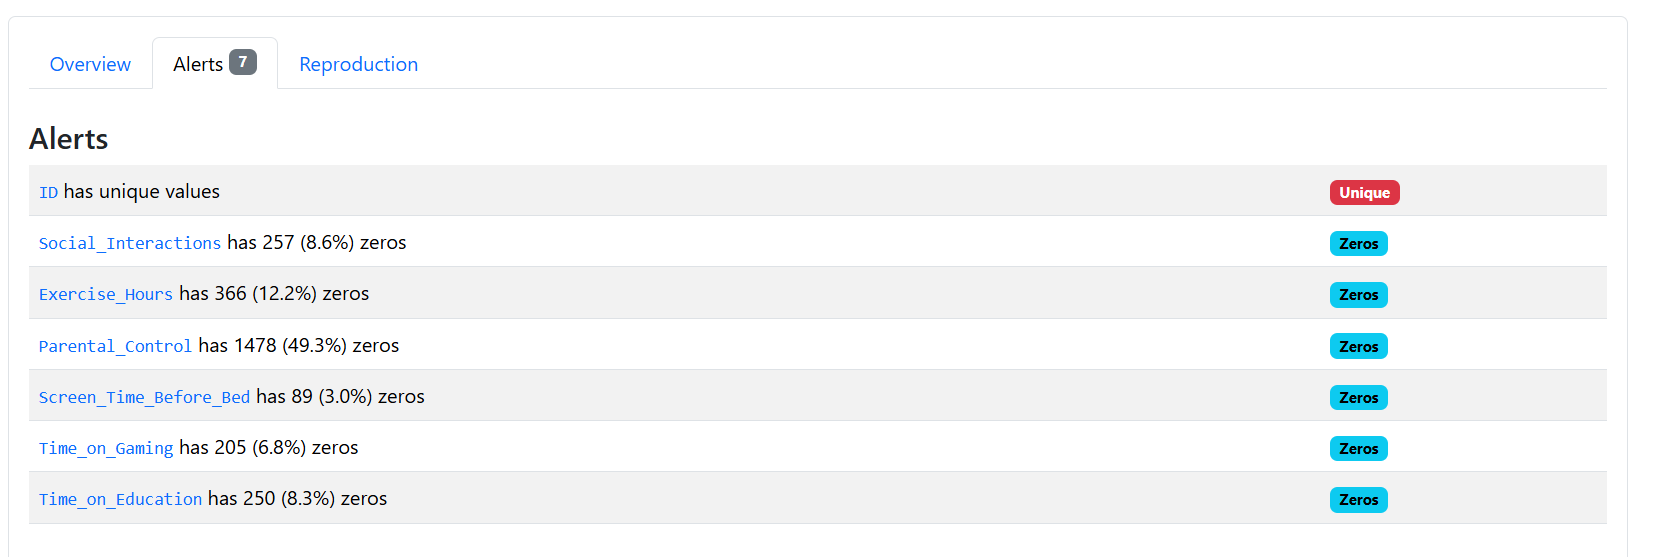

# Alertas encontradas en el análisis de los datos

alertas que se  detectó con el reporte generado con el dataset de los datos sobre el uso del celular en jóvenes:

---

## 1. `ID` tiene valores únicos

- Cada fila tiene un número distinto.
- No ayuda en el análisis porque no da información útil.
- Se puede ignorar o quitar si no se necesita.

---

## 2. Hay muchas respuestas con **cero (0)**

El sistema encontró varias columnas donde muchas personas pusieron "0". Esto nos puede decir  que **no hacen esa actividad** o que **no respondieron**.

---

.Muchas personas dijeron que no hacen ejercicio o no tienen control parental.

.Otras pueden no haber respondido esas preguntas.

Esos ceros pueden influir en los resultados,
---

## Que se puede hacer

- Revisar si esos ceros son válidos o si hay que cambiarlos o quitarlos.
- podemos eliminar el  `ID` para análisis.


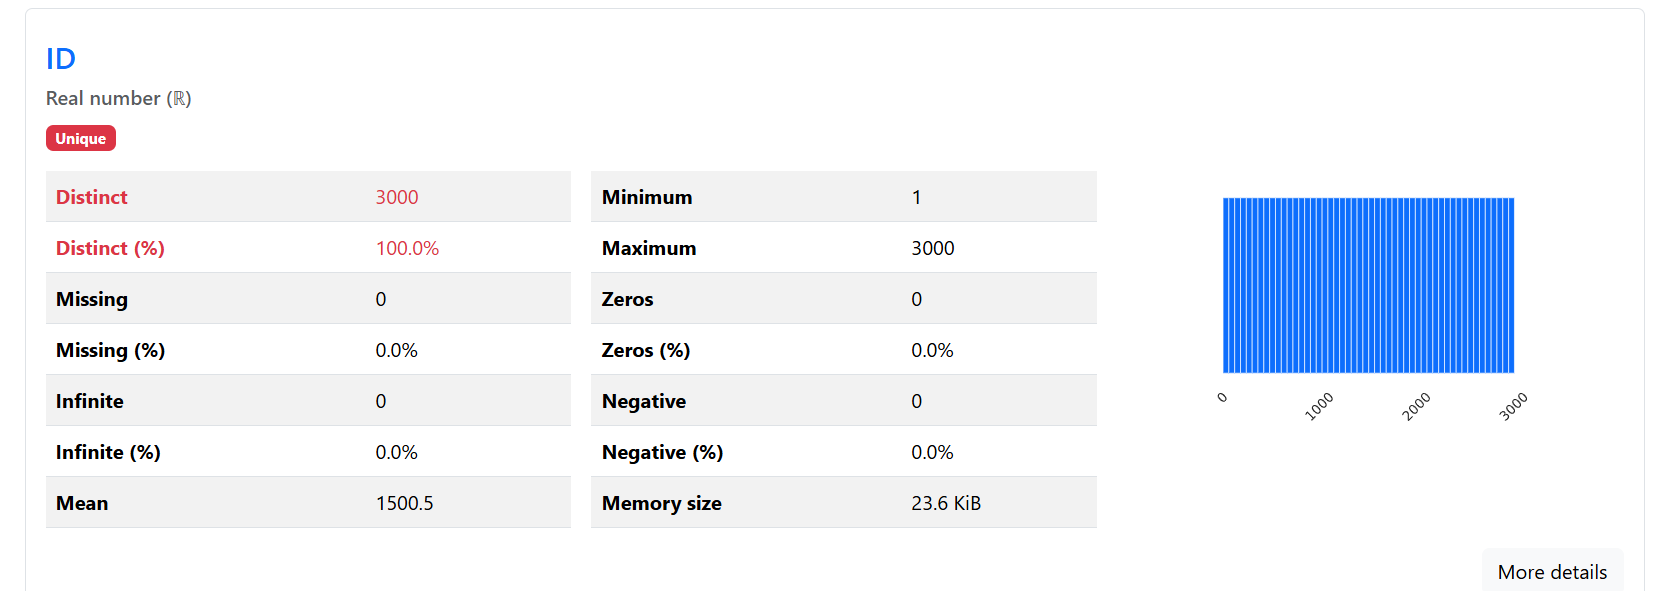

## **3. Limpieza y Transformación de Datos**


 ### necesario para la mayoria de dataset aun que este al analizarlo no tiene valores nulos en sus columnas ni tampoco filas repetidas

In [ ]:
# Verificar si hay valores nulos en cada columna del DataFrame
print("Verificando si hay valores nulos en cada columna:")
print(df.isnull().sum())

# Eliminar columnas irrelevantes
# Se revisa si la columna 'Gender' existe y si todos los valores son iguales (por ejemplo, todos son del mismo sexo).
# Si es así, se elimina porque no aporta información útil.
if 'Gender' in df.columns and df['Gender'].nunique() == 1:
    df.drop(columns=['Gender'], inplace=True)
    print("\nSe eliminó la columna 'Gender' porque todos sus valores eran iguales.")
else:
    print("\nNo se eliminó la columna 'Gender'.")

# Rellenar valores faltantes en la columna 'Age' si es necesario
if 'Age' in df.columns:
    nulos_age = df['Age'].isnull().sum()
    if nulos_age > 0:
        df['Age'] = df['Age'].fillna(df['Age'].median())
        print(f"\nSe completaron {nulos_age} valores faltantes en 'Age' utilizando la mediana.")
    else:
        print("\nLa columna 'Age' no tiene valores faltantes.")
else:
    print("\nNo se encontró la columna 'Age'.")

# Rellenar valores faltantes en la columna 'Sleep_Hours' si es necesario
if 'Sleep_Hours' in df.columns:
    nulos_sleep = df['Sleep_Hours'].isnull().sum()
    if nulos_sleep > 0:
        df['Sleep_Hours'] = df['Sleep_Hours'].fillna(df['Sleep_Hours'].mean())
        print(f"Se completaron {nulos_sleep} valores faltantes en 'Sleep_Hours' utilizando la media.")
    else:
        print("La columna 'Sleep_Hours' no tiene valores faltantes.")
else:
    print("No se encontró la columna 'Sleep_Hours'.")

# Rellenar valores faltantes en la columna 'Stress_level' si es necesario
if 'Stress_level' in df.columns:
    nulos_stress = df['Stress_level'].isnull().sum()
    if nulos_stress > 0:
        df['Stress_level'] = df['Stress_level'].fillna(df['Stress_level'].mean())
        print(f"Se completaron {nulos_stress} valores faltantes en 'Stress_level' utilizando la media.")
    else:
        print("La columna 'Stress_level' no tiene valores faltantes.")
else:
    print("No se encontró la columna 'Stress_level'.")

# Eliminar filas duplicadas
filas_iniciales = df.shape[0]
df = df.drop_duplicates()
filas_finales = df.shape[0]

# Mostrar cuántas filas duplicadas fueron eliminadas
if filas_iniciales > filas_finales:
    print(f"\nSe eliminaron {filas_iniciales - filas_finales} filas duplicadas.")
else:
    print("\nNo se encontraron filas duplicadas.")

print("\nLimpieza y transformación de datos completada.")


## **4. Visualizacion de Resultados**

In [ ]:
# Correlación entre variables numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

In [ ]:
# Relación entre tiempo en el teléfono y chequeos diarios
sns.scatterplot(x="Daily_Usage_Hours", y="Phone_Checks_Per_Day", data=df)
plt.title("Relación entre uso del smartphone y chequeos diarios")
plt.show()

In [ ]:
# Histograma de edad
sns.histplot(df['Age'], bins=10, kde=True)
plt.title("Distribución de Edad")
plt.show()

In [ ]:
# Boxplot de calidad del sueño por horas de uso del teléfono
sns.boxplot(x=pd.qcut(df['Daily_Usage_Hours'], q=4), y='Sleep_Hours', data=df)
plt.title("Calidad de sueño según uso del smartphone")
plt.xticks(rotation=45)
plt.show()

#**5. Documentación y presentación**

Finalmente, proyecto debe ser entregado en un repositorio de github, que incluya el notebook de jupyter, los conjuntos de datos utilizados, y un breve informe que resuma tus hallazgos, observaciones clave, y visualizaciones más importantes, comentarios en el código y una sección de conclusiones donde expliques los resultados obtenidos y las posibles implicaciones o próximos pasos a seguir.